<a href="https://colab.research.google.com/github/Eric428-a/DataAnalysisProject/blob/main/mlbootcamp5_train_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. Load the Data
df = pd.read_csv('/content/mlbootcamp5_train.csv (1).csv')

In [3]:
# 3. Inspect the Data
# Get a quick overview of the data
print("Head:")
print(df.head())

Head:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [4]:
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


In [5]:
print("\nDescription:")
print(df.describe())


Description:
                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530    

In [6]:
# 4. Check for Missing Values
missing_values = df.isnull().sum()

In [7]:
print("\nMissing Values:")
print(missing_values)


Missing Values:
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [8]:
# 5. Handle Missing Values (if applicable)
# Since there are no missing values, this step is not needed for this dataset

In [9]:
# 6. Check for Duplicate Values
duplicate_values = df.duplicated().sum()

In [10]:
print("\nDuplicate Values:")
print(duplicate_values)


Duplicate Values:
0


In [11]:
# 7. Remove Duplicate Values (if applicable)
# Since there are no duplicate values, this step is not needed for this dataset

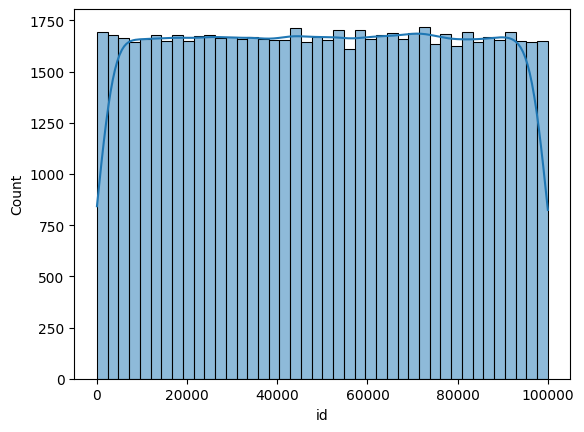

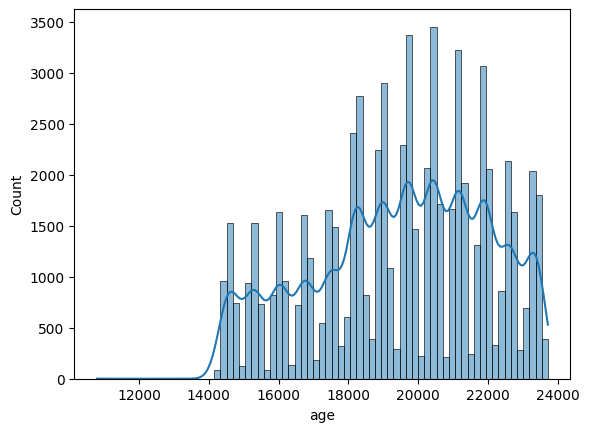

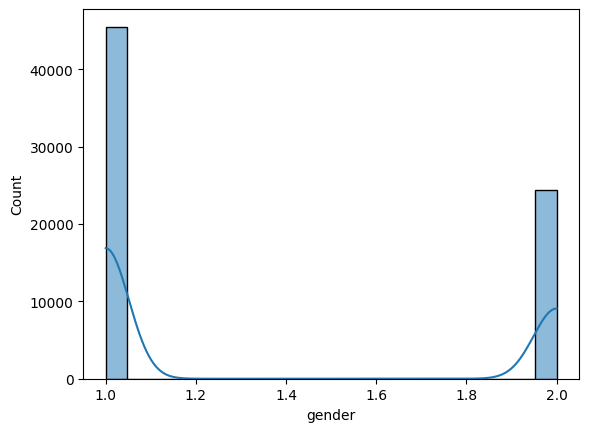

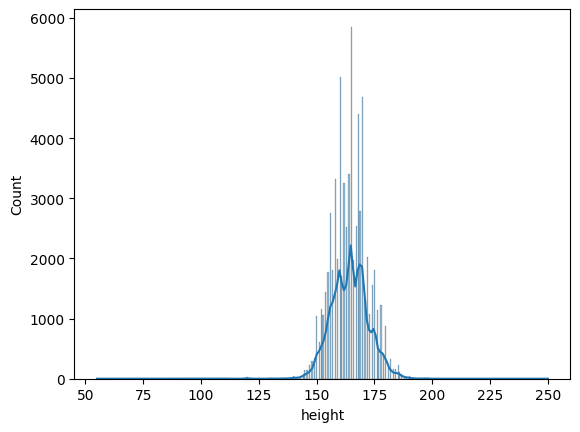

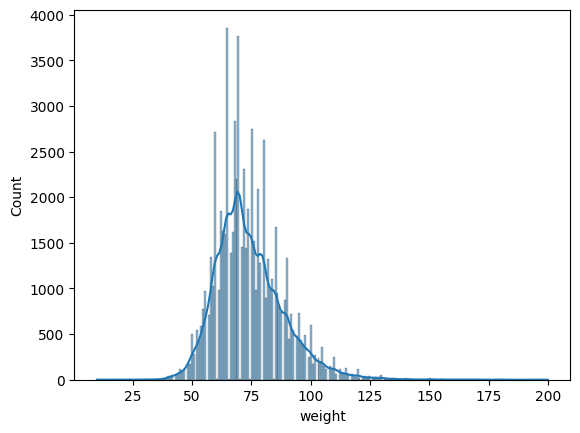

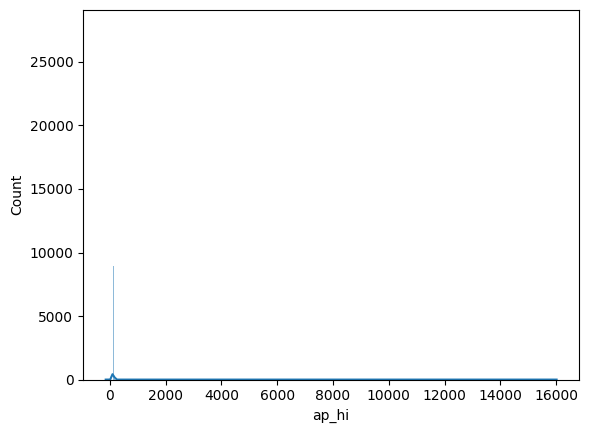

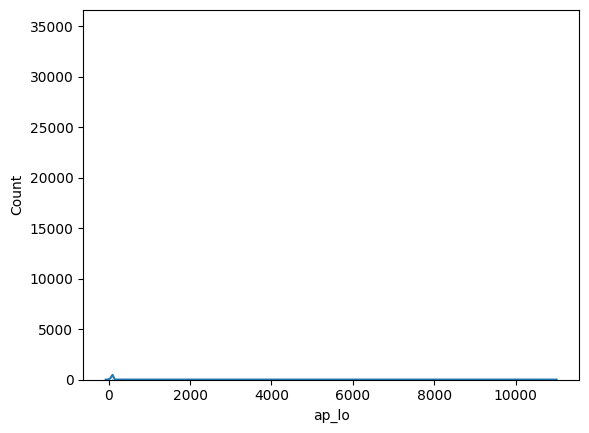

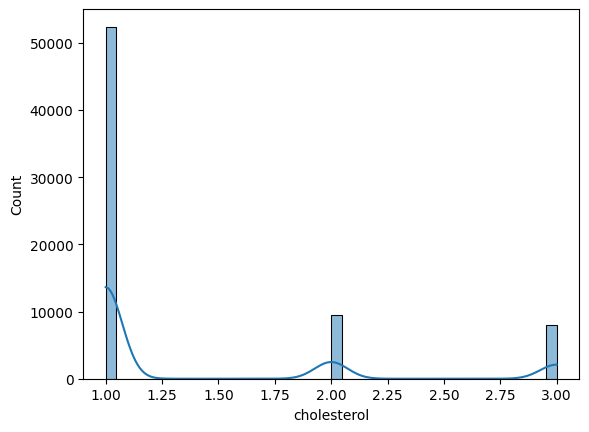

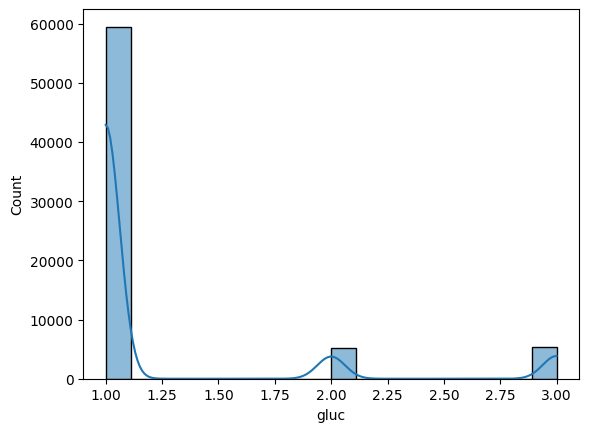

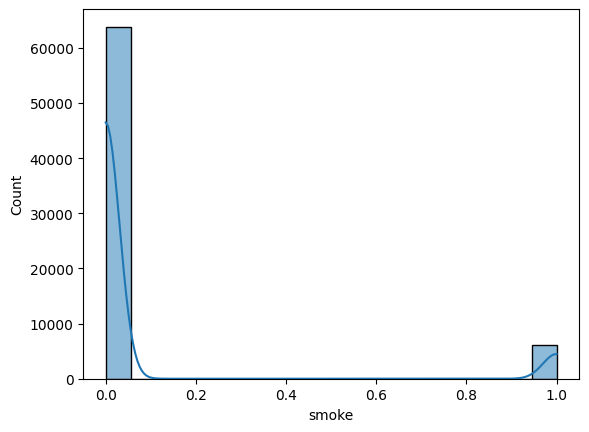

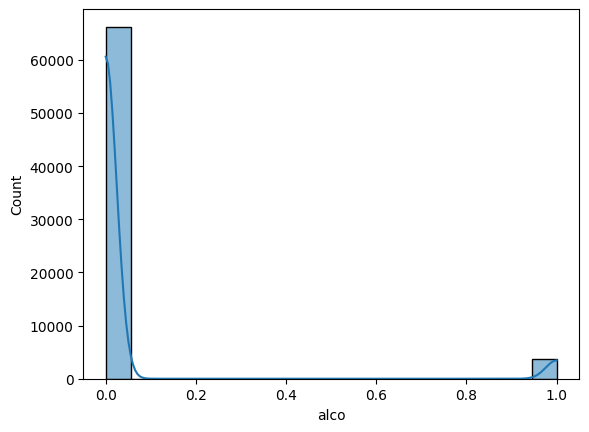

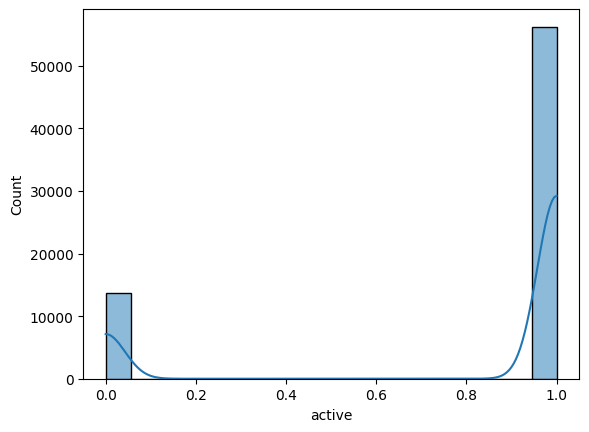

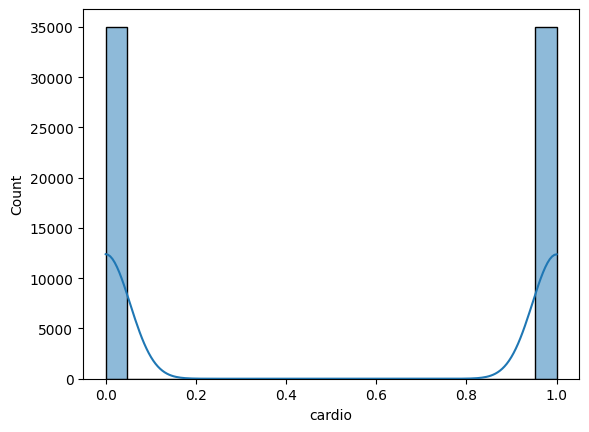

In [12]:
# 8. Visualize the Data
# Histogram with kernel density estimation
for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.show()

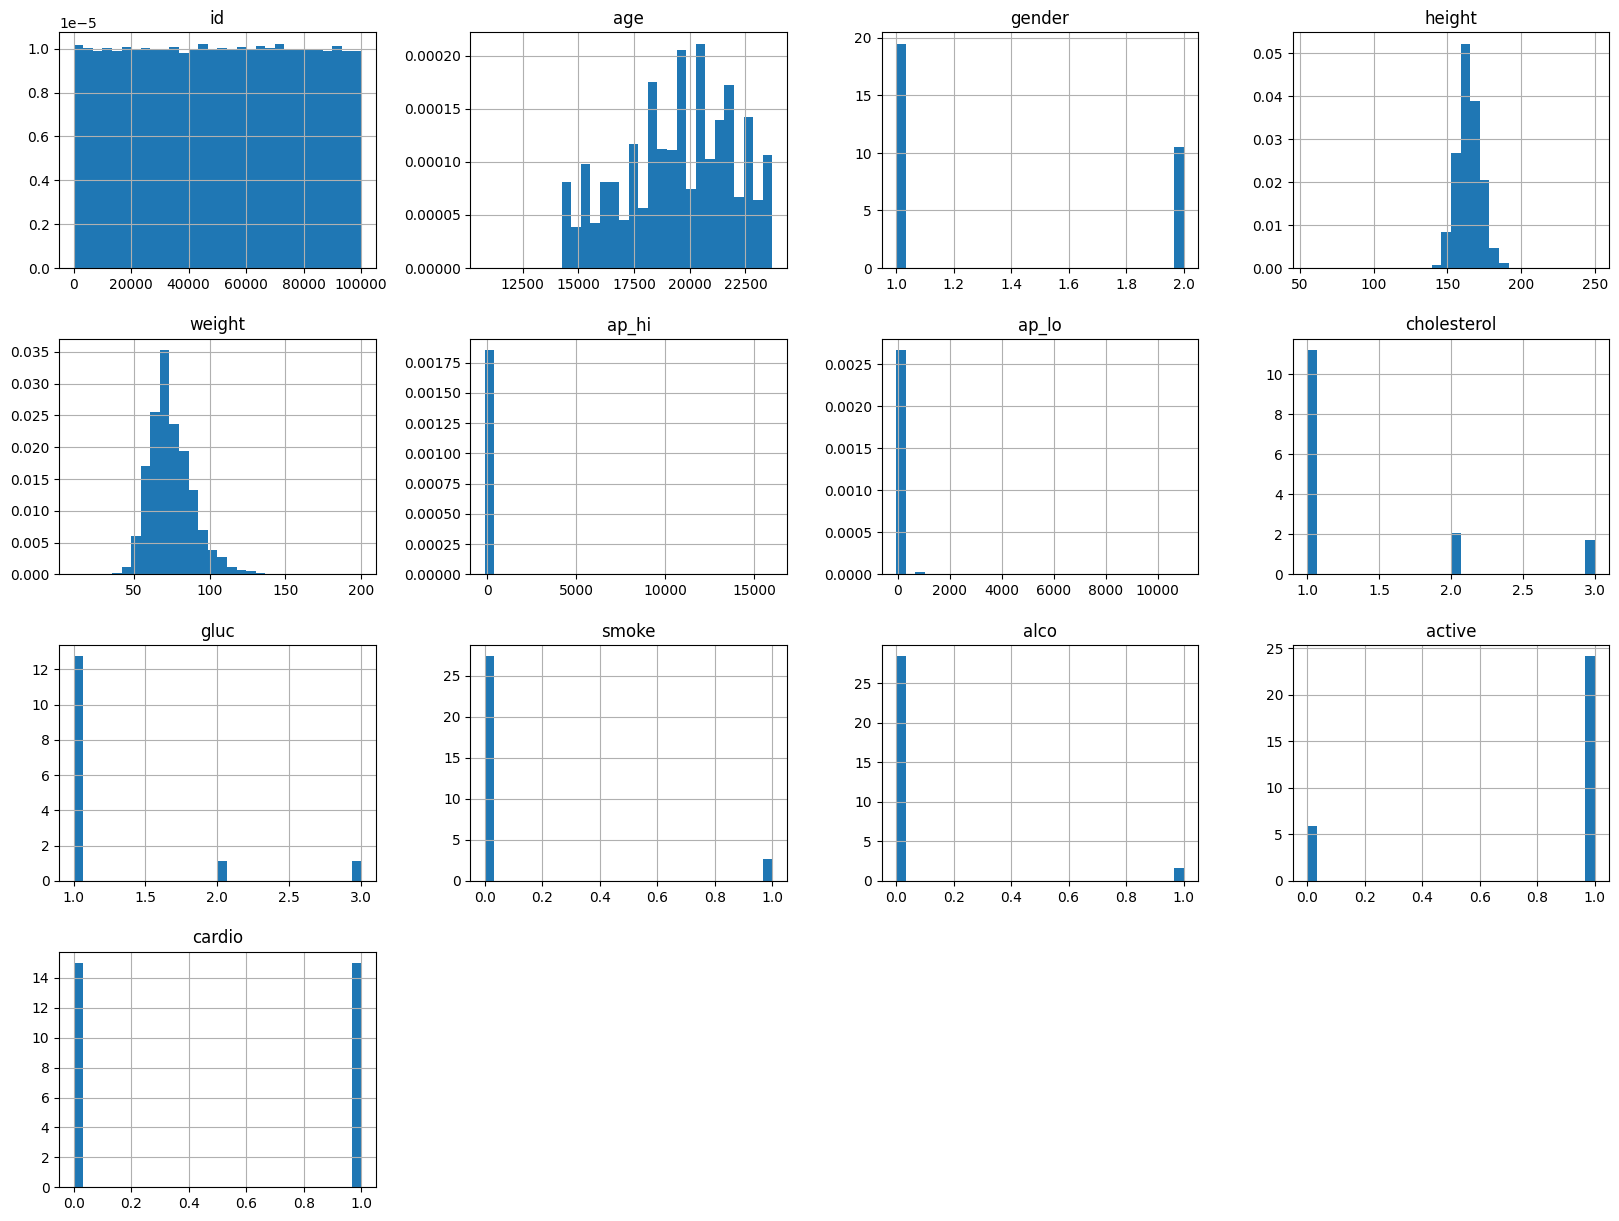

In [13]:
# 9. Check Data Distribution
df.hist(bins=30, figsize=(20, 15), density=True)
plt.show()

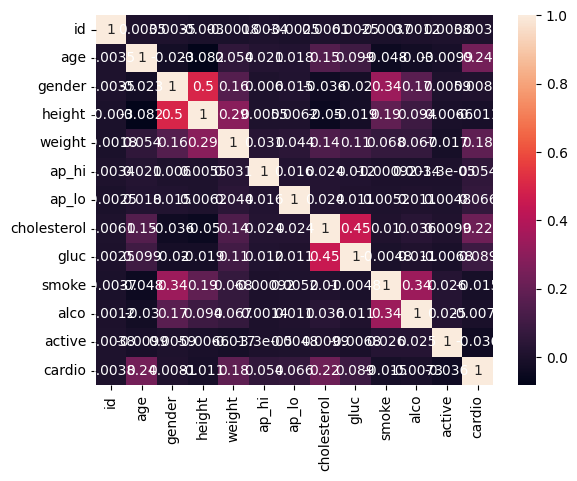

In [15]:
# 10. Check Correlations
# Correlation matrix
sns.heatmap(df.corr(), annot=True)
plt.show()

In [16]:
# 11. Handle Categorical Variables (if applicable)
# This step is not applicable as there are no categorical variables in this dataset

In [23]:
# 12. Outlier Detection (if applicable)
# Depending on the nature of the data, you might need to handle outliers
# For example, using methods like the IQR score or Z-score to detect and handle outliers

In [24]:
# Define the function for outlier detection using IQR method
def detect_outliers_iqr(df, features):
    outlier_indices = []
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices.extend(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)
    return list(set(outlier_indices))

In [25]:
# List of features for outlier detection
outlier_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']


In [26]:
# Detect outliers
outlier_indices = detect_outliers_iqr(df, outlier_features)

In [27]:
# Print the indices of outliers
print("Indices of outliers:", outlier_indices)

Indices of outliers: [32769, 65539, 4, 9, 65547, 32782, 15, 65550, 65552, 65553, 23, 32792, 32795, 32797, 32803, 32808, 32810, 43, 50, 32819, 32820, 32823, 56, 32826, 59, 65596, 61, 62, 32831, 65597, 32839, 76, 83, 85, 65626, 65629, 97, 101, 32879, 65648, 65650, 115, 32886, 32896, 65667, 65669, 65678, 65685, 65687, 32919, 151, 32920, 32930, 65700, 32939, 65708, 176, 65723, 188, 196, 32971, 209, 65751, 32989, 65758, 224, 32994, 228, 230, 33004, 241, 249, 65791, 260, 33033, 266, 267, 65804, 270, 33044, 33046, 33047, 65814, 33049, 33053, 286, 33061, 296, 33064, 65832, 33067, 33070, 65842, 33084, 33091, 33095, 329, 33097, 33103, 33105, 338, 345, 65884, 353, 355, 65899, 33137, 65906, 372, 65911, 65914, 383, 65923, 388, 389, 390, 65925, 393, 65932, 65935, 65938, 65941, 411, 33180, 413, 65950, 33186, 418, 65959, 423, 65961, 65966, 435, 33204, 437, 33206, 33209, 444, 446, 65990, 33235, 473, 474, 66009, 477, 481, 66019, 33253, 66023, 33255, 33257, 489, 491, 66028, 33261, 33259, 33263, 496, 6603

In [17]:
# 13. Feature Scaling (if applicable)
# Depending on the algorithm you plan to use, feature scaling may be necessary
# For algorithms sensitive to feature scales, like SVM or KNN, feature scaling is required

In [28]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [29]:
# Initialize StandardScaler
scaler = StandardScaler()

In [30]:
# Drop the target column (assuming 'cardio' is the target variable)
target_column = 'cardio'

In [31]:
scaled_features = scaler.fit_transform(df.drop(target_column, axis=1))

In [33]:
# Create a DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])  # Excluding the target column